In [1]:
username       = " "
password       = " "
profile_type   = 'okr-sprout'

In [3]:
import requests
import urllib

url = 'https://demo.grnry.io/auth/realms/grnry/protocol/openid-connect/token'

payload = f'grant_type=password&username={urllib.parse.quote_plus(username)}&password={urllib.parse.quote_plus(password)}&client_id=profile-api'
headers = {
  'Content-Type': 'application/x-www-form-urlencoded'
}

response = requests.request('POST', url, headers=headers, data = payload)

token = response.json()['access_token']

In [14]:
responses = []
for correlation_id in ['CS','product','growth']:
  url = f"https://demo.grnry.io/profiles/okr-sprout/{correlation_id}?fragments="
  headers = {
    'Authorization': f'Bearer {token}'}
  response = requests.request("GET", url, headers=headers)
  responses.append(response.json())



In [28]:
import pandas as pd

profiles = [ {'circle':p['correlationId'],**p['jsonPayload']} for p in responses]

for i in range(len(profiles)):
    profiles[i].pop('_id',None)
circles = pd.json_normalize(profiles,max_level=2)
circles = circles.melt(id_vars=['circle'])
values = pd.json_normalize(circles['value'],max_level=0)
values = values.applymap(lambda x: x.get('_latest').get('_v') if isinstance(x, dict) else '0')
okr_progress = pd.concat([circles[['circle','variable']],values],axis=1)
okr_progress


,circle,variable,numberOfKR,progressOfKR
0,CS,2020.11.26,10,75
1,product,2020.11.26,10,165
2,growth,2020.11.26,9,0
3,CS,2020.11.27,10,75
4,product,2020.11.27,10,165
5,growth,2020.11.27,9,0
6,CS,2020.11.28,10,75
7,product,2020.11.28,10,165
8,growth,2020.11.28,9,0
9,CS,2020.11.29,10,75


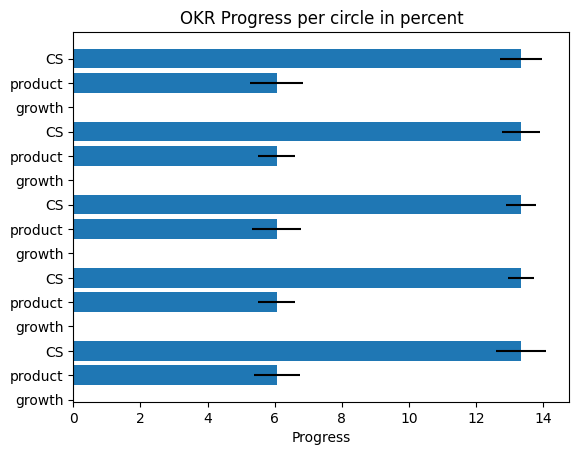

In [31]:
import matplotlib.pyplot as plt
import seaborn

plt.rcdefaults()
fig, ax = plt.subplots()

circle = okr_progress['circle']
y_pos = np.arange(len(circle))
performance = (okr_progress['numberOfKR'].astype(int)*100/
               okr_progress['progressOfKR'].astype(int)).tolist()
error = np.random.rand(len(circle))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(circle)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Progress')
ax.set_title('OKR Progress per circle in percent')

plt.show()

In [ ]:
version

NameError: ignored

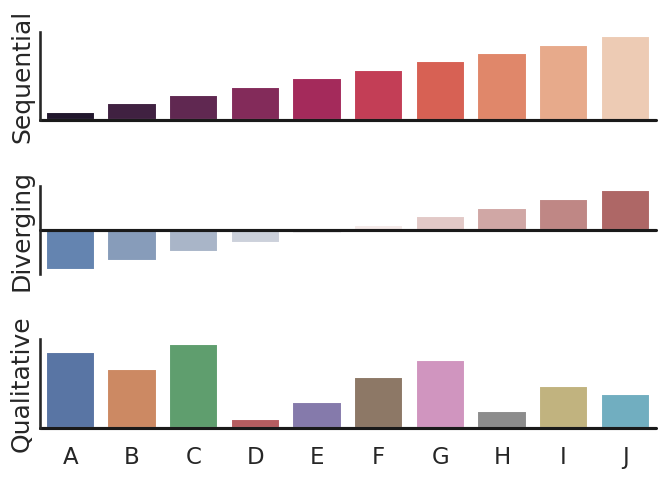

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)